# rmlib Component Testing 
### This notebook is used to test the functionality of rmlib 

In [1]:
%load_ext autoreload
%autoreload 2
from context import rmlib
import rmlib.rmtools as rm

# RealSense

## Init

In [2]:
# Restart notebook before running cell
config = {
    'active_components' : {
        'camera' : ['my_component'],
        'hand' : [],
        'arm' : [],
        'ft_sensor' : [],
        'cart' : [],
    },
    'my_components' : {
        'my_component' : {
            'module_name' : 'cameras.realsense',
            'class_name' : 'RealSense',
            'camera_model' : 'd410', #'d415',
            'ci_cam_offset' : [0, 0, 0],
            'pc_cam_offset' : [0, 0, 0],
        },        
    },
}

robot = rmlib.robot.Robot(config)

Setting up robot please wait...
my_components: {'my_component': {'ci_cam_offset': [0, 0, 0], 'class_name': 'RealSense', 'pc_cam_offset': [0, 0, 0], 'camera_model': 'd410', 'module_name': 'cameras.realsense'}}
active_componetns: {'camera': ['my_component'], 'ft_sensor': [], 'hand': [], 'arm': [], 'cart': []}
Robot Ready!


## Color Image

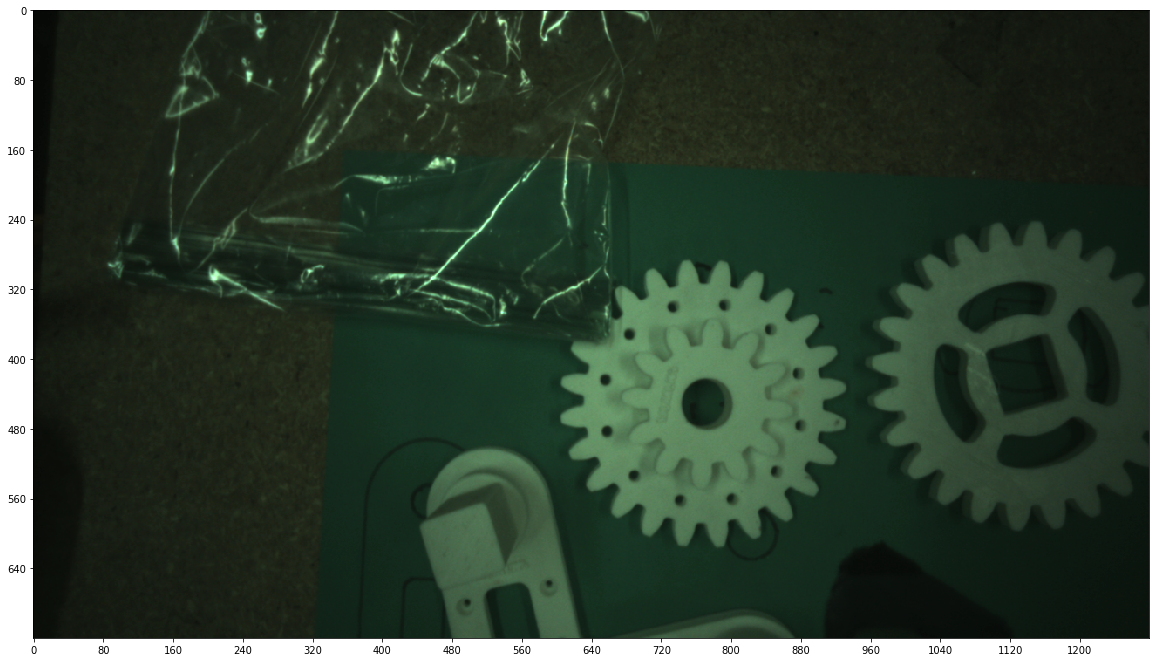

In [3]:
img = robot.camera.get_color_image()
rm.viewer.show_image(img)

## Depth Image

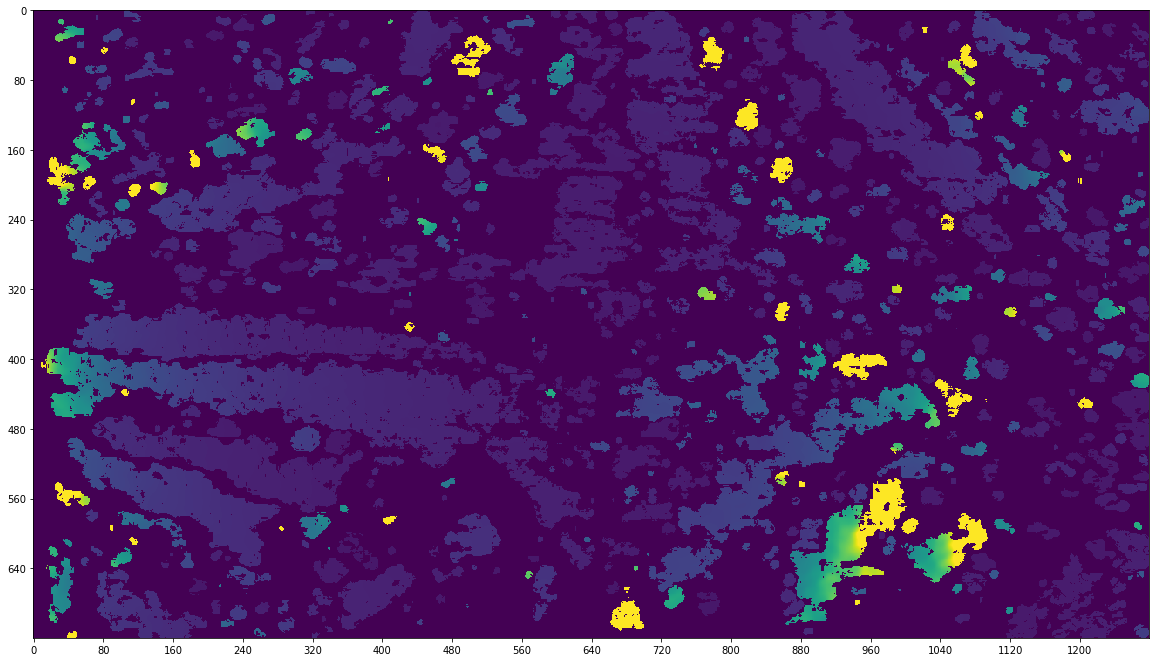

In [4]:
img = robot.camera.get_depth_image()
rm.viewer.show_image(img)

## Point Cloud

In [6]:
cloud = robot.camera.get_cloud()
print( cloud )
rm.viewer.show_cloud(cloud)

[[-0.6547224  -0.47174004  1.1922    ]
 [-0.65345395 -0.47174004  1.1922    ]
 [-0.6521855  -0.47174004  1.1922    ]
 ...
 [ 0.8506453   0.45295507  1.2265999 ]
 [ 0.8519503   0.45295507  1.2265999 ]
 [ 0.85262936  0.45262274  1.2257    ]]


Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(0.017416249477660548, 2.435306302027199, 11.…

# UR5

In [7]:
# Restart notebook before running cell
config = {
    'active_components' : {
        'camera' : [],
        'hand' : [],
        'arm' : ['my_component'],
        'cart' : [],
    },
    'my_components' : {
        'my_component' : {
            "module_name" : "arms.ur5",
            "class_name" : "UR5",
            "ip_address" : "192.168.0.7",#"10.1.12.183",
            "xmlrpc_port" : "8003",
            "max_linear_speed" : 0.25,
            "max_linear_accel" : 1.2,
            "max_joint_speed" : 1.05,
            "max_joint_accel" : 1.4,
            "default_linear_speed" : 0.1,
            "default_joint_speed" : 0.7,
            "default_linear_accel" : 0.8,
            "default_joint_accel" : 0.8
        },
    },
}

robot = rmlib.robot.Robot(config)

Setting up robot please wait...
Robot Ready!


In [8]:
robot.arm.power_off()

In [9]:
robot.arm.power_on()

In [10]:
robot.arm.brake_release()

In [11]:
robot.arm.get_tcp_pose_vec()

[-0.11343252383651078,
 -0.49435538792283573,
 0.0807176769851794,
 -2.138210600775221,
 -2.2028752792664057,
 -0.06970674046557211]

In [12]:
robot.arm.get_tcp_pose()

array([[-0.02894491,  0.99939643, -0.01920859, -0.11343837],
       [ 0.99618356,  0.03042423,  0.08180877, -0.49436094],
       [ 0.08234379, -0.01676733, -0.99646292,  0.08073249],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [13]:
robot.arm.get_joint_angles()

[-1.5627062956439417,
 -1.668934170399801,
 -1.645052735005514,
 -1.4814770857440394,
 1.5579736232757568,
 1.5491787195205688]

In [15]:
#robot.arm.receive_client.getActualTCPForce()

In [16]:
robot.arm.translate_tcp([0,0,0.01])

In [17]:
robot.arm.move_to_common_pose('-y')

# OptoForce

In [2]:
config = {
    'active_components' : {
        'camera' : [],
        'hand' : [],
        'arm' : [],
        'cart' : [],
        'ft_sensor' : ['my_component'],
    },
    'my_components' : {
        'my_component' : {
            "module_name" : "sensors.ftsensor_optoforce",
            "class_name" : "OptoForce",
            "ip_address" : "192.168.0.3",#"10.1.12.183",
            
        },
    },
}
robot = rmlib.robot.Robot(config)

Setting up robot please wait...
my_components: {'my_component': {'ip_address': '192.168.0.3', 'class_name': 'OptoForce', 'module_name': 'sensors.ftsensor_optoforce'}}
active_componetns: {'cart': [], 'camera': [], 'ft_sensor': ['my_component'], 'arm': [], 'hand': []}
{'ip_address': '192.168.0.3', 'class_name': 'OptoForce', 'module_name': 'sensors.ftsensor_optoforce'}
<class 'rmlib.sensors.ftsensor_optoforce.OptoForce'>
Robot Ready!


In [5]:
robot.ft_sensor.bias_wrist_force()

b'{"result":0,"error":"","response":{"id":"bias"}}\r\n\r\n'

In [8]:
robot.ft_sensor.get_wrist_force()

[-0.34999996423721313,
 -0.20000004768371582,
 -1.75,
 0.04550004005432129,
 -0.04674994945526123,
 -0.0005000010132789612]

## rtde

In [18]:
robot.arm.dashboard_client.restartSafety()

AttributeError: 'UR5' object has no attribute 'dashboard_client'

In [19]:
robot.arm.dashboard_client.closeSafetyPopup()

AttributeError: 'UR5' object has no attribute 'dashboard_client'

In [20]:
robot.arm.dashboard_client.programState()

AttributeError: 'UR5' object has no attribute 'dashboard_client'

In [21]:
robot.arm.dashboard_client.safetymode()

AttributeError: 'UR5' object has no attribute 'dashboard_client'

In [22]:
robot.arm.dashboard_client.safetystatus()

AttributeError: 'UR5' object has no attribute 'dashboard_client'

In [23]:
robot.arm.dashboard_client.robotmode()

AttributeError: 'UR5' object has no attribute 'dashboard_client'

In [24]:
robot.arm.receive_client.getRobotMode()

AttributeError: 'UR5' object has no attribute 'receive_client'

In [25]:
robot.arm.control_client.zeroFtSensor()

AttributeError: 'UR5' object has no attribute 'control_client'

In [26]:
robot.arm.control_client.isConnected()

AttributeError: 'UR5' object has no attribute 'control_client'

In [27]:
import time
for i in range(100):
    print(robot.arm.control_client.isConnected())
    time.sleep(1)

AttributeError: 'UR5' object has no attribute 'control_client'

In [28]:
robot.arm.control_client.reconnect()

AttributeError: 'UR5' object has no attribute 'control_client'

In [29]:
robot.arm.control_client.teachMode()

AttributeError: 'UR5' object has no attribute 'control_client'

In [30]:
robot.arm.control_client.endTeachMode()

AttributeError: 'UR5' object has no attribute 'control_client'

# SmartHand

In [31]:
# Restart notebook before running cell
config = {
    'active_components' : {
        'camera' : [],
        'hand' : ['my_component'],
        'arm' : [],
        'cart' : [],
    },
    'my_components' : {
        'my_component' : {
            "module_name" : "hands.smarthand",
            "class_name" : "SmartHand",
            "finger_length": 0.0415,
            "finger_width_outer" : 0.015,
            "finger_width_inner" : 0.0,
            "finger_depth" : 0.014
        },
    },
}
robot = rmlib.robot.Robot(config)

Setting up robot please wait...
Robot Ready!


In [32]:
robot.hand.grip()

False

In [33]:
robot.hand.release()

False

In [34]:
robot.hand.deactivate_motors()

1

# VGC10

In [ ]:
# Restart notebook before running cell
config = {
    'active_components' : {
        'camera' : [],
        'hand' : ['my_component'],
        'arm' : ['my_arm'],
        'cart' : [],
    },
    'my_components' : {
        'my_component' : {
            "module_name" : "hands.vgc10",
            "class_name" : "VGC10",
            "finger_length": 0.0415,
            "finger_width_outer" : 0.015,
            "finger_width_inner" : 0.0,
            "finger_depth" : 0.014
        },
        'my_arm' : {
            "module_name" : "arms.ur5",
            "class_name" : "UR5",
            "ip_address" : "10.1.12.81",
            "xmlrpc_port" : "8003",
            "max_linear_speed" : 0.25,
            "max_linear_accel" : 1.2,
            "max_joint_speed" : 1.05,
            "max_joint_accel" : 1.4,
            "default_linear_speed" : 0.1,
            "default_joint_speed" : 0.7,
            "default_linear_accel" : 0.8,
            "default_joint_accel" : 0.8,
            
        },
    },
}
robot = rmlib.robot.Robot(config)

In [ ]:
robot.arm.power_on()

In [ ]:
robot.arm.brake_release()

In [ ]:
robot.hand.grip()

In [ ]:
robot.hand.release()

# MiR Cart

In [2]:
# Restart notebook before running cell
config = {
    'active_components' : {
        'camera' : [],
        'hand' : [],
        'arm' : [],
        'cart' : ['my_component'],
    },
    'my_components' : {
        'my_component' : {
            "module_name" : "carts.mir100",
            "class_name" : "Mir_Cart",
            "ip_address" : '10.1.12.186'
        },
    },
}
robot = rmlib.robot.Robot(config)

Setting up robot please wait...
Robot Ready!


In [3]:
robot.cart.get_status()

{'allowed_methods': None,
 'battery_percentage': 9.5,
 'battery_time_remaining': 9157,
 'distance_to_next_target': 0.0,
 'errors': [],
 'footprint': '[[0.506,-0.32],[0.506,0.32],[-0.454,0.32],[-0.454,-0.32]]',
 'joystick_low_speed_mode_enabled': False,
 'joystick_web_session_id': '',
 'map_id': 'a7524472-22a1-11ea-aeda-94c691a739e9',
 'mission_queue_id': None,
 'mission_queue_url': None,
 'mission_text': 'Waiting for new missions...',
 'mode_id': 7,
 'mode_key_state': 'idle',
 'mode_text': 'Mission',
 'moved': 138787.7038635686,
 'position': {'orientation': -0.014996565878391266,
  'x': 47.805519104003906,
  'y': 14.984346389770508},
 'robot_model': 'MiR100',
 'robot_name': 'MiR_R1319',
 'safety_system_muted': False,
 'serial_number': '190100003001319',
 'session_id': 'a191c2cf-22a1-11ea-aeda-94c691a739e9',
 'state_id': 10,
 'state_text': 'EmergencyStop',
 'unloaded_map_changes': False,
 'uptime': 6919,
 'user_prompt': None,
 'velocity': {'angular': 0.0, 'linear': 0.0}}

In [ ]:
robot.cart.get_state()

In [ ]:
robot.cart.get_sounds()

In [ ]:
robot.cart.play_sound('49c0c1f8-ba39-11e9-bb74-94c691a739e9', volume=1)

In [ ]:
robot.cart.get_coordinates()

In [ ]:
robot.cart.move_to_coordinates(49.5067024230957, 14.28571891784668, -0.63803100585938)

In [ ]:
robot.cart.get_positions()

In [ ]:
robot.cart.get_position_coordinates('3852484c-394f-11ea-9fa4-94c691a739e9')

In [ ]:
robot.cart.get_position_by_name('1')

In [ ]:
%%time
position_id = robot.cart.get_position_by_name('1')
robot.cart.move_to_position(position_id, blocking = False)

In [ ]:
%%time
position_id = robot.cart.get_position_by_name('2')
robot.cart.move_to_position(position_id, blocking = False)

In [ ]:
robot.cart.get_missions()